In [101]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
sns.set_palette("muted")
sns.set_context("paper")
sns.set_style("darkgrid")

# Клиенты телекоммуникационной компании
**Контекст**
<p>Даны данные клиентов. Задача: уйдет ли клиент по его поведению в системе.</p>

#### Загрузка и обзор данных

##### Данные

In [9]:
path_data = "../data/"
path_file_csv = os.path.join(path_data, os.listdir(path_data)[0]) 
path_file_csv

'../data/Telco-Customer-Churn.csv'

In [10]:
df = pd.read_csv(path_file_csv)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Описание данных

**Целевая переменная (target)** 
- `Churn` - ушел ли клиент или нет

**Признаки (features)**
- `customerID` - ID клиента
- `gender` - пол клиента
- `SeniorCitizen` - является ли клиент пожилым
- `Partner` -  есть ли у клиента партнер
- `Dependents` - есть ли у клиента иждивенцы(дети)
- `tenure` - количество месяцев, в течении которых клиент оставался пользоваться услугами
- `PhoneService` - подписан ли клиент на услугу домашнего телефона в компании
- `MultipleLines` - подписан ли клиент на несколько телефонных линий компании
- `InternetService` - подписан ли клиент на интернет-услуги в компании
- `OnlineSecurity` - подписан ли клиент на дополнительную услугу онлайн-безопасности, предоставляемую компанией
- `OnlineBackup` - подписан ли клиент на дополнительную онлайн-службу резервного копирования, предоставляемую компанией
- `DeviceProtection` - подписан ли клиент на дополнительный план защиты своего интернет-оборудования, предоставляемый компанией
- `TechSupport` - подписан ли клиент на дополнительный план технической поддержки от компании с сокращенным временем ожидания
- `StreamingTV` - использует ли клиент свой Интернет-сервис для потоковой передачи телевизионных программ стороннего поставщика
- `StreamingMovies` - использует ли клиент свои интернет-услуги для потоковой передачи фильмов от стороннего поставщика
- `Contract` - текущий тип контракта клиента
- `PaperlessBilling` - выбрал ли клиент получать электронный чек
- `PaymentMethod` - как клиент оплачивает свой счет
- `MonthlyCharges` - текущая общая ежемесячная плата клиента за все свои услуги от компании
- `TotalCharges` - общие расходы клиента, рассчитанные на конец квартала, указанного выше

#### Исследование данных

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Посмотрим какие переменные могут быть потенциально категориальными

In [37]:
df.select_dtypes(include=["object"]).head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [41]:
assert df["customerID"].nunique() == df.shape[0], "Сумма уникальных значений меньше, чем весь датасет"

**Note**  
В целом практически категориальные, кроме `custometID` - его можно выкинуть, т.к. это уникальный индефикатор пользователя.  
`Contract` - это порядковая переменная. Т.к. чем дольше клиент с нами, тем он ценнее должен оцениваться.  
`TotalCharges` - тут *проблема*. По факту тип данных должен быть *float*. С этим надо разобраться.

##### Посмотрим какие переменные могут быть потенциально числовыми

In [45]:
df.select_dtypes(include=["int", "float"]).head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


**Note**  
`SeniorCitizen` - это категориальный признак, т.к. отвечает пожилой ли у нас клиент  
`tenure`, `MonthlyCharges` попадают под числовый признаки

Осталось поправить признак `TotalCharges`, чтобы убедиться, что это тоже числовой. 

In [90]:
def astype_columns(df:pd.DataFrame, columns:str) -> pd.DataFrame:
    try:
        df[columns] = df[columns].astype(np.float64)
    except ValueError as se:
        print(se.args[0])
        print("Тип данных не может быть изменен, т.к. не все данные числа")
    return df

In [75]:
df = astype_columns(df, "TotalCharges")

Unable to parse string " " at position 488
Тип данных не может быть изменен, т.к. не все данные числа


In [77]:
df.iloc[np.where(df["TotalCharges"] == " ")[0]]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Заменим пустые значения значениями из `MonthlyCharges`, т.к. они там все присутствуют в должном виде.  
И попробуем снова поменять тип данных

In [83]:
df.loc[np.where(df["TotalCharges"] == " ")[0], ("TotalCharges")] =\
    df.loc[np.where(df["TotalCharges"] == " ")[0], ("TotalCharges")].astype(str)

In [93]:
df = astype_columns(df, "TotalCharges")
df = df.drop(columns=["customerID"])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Note**  
Теперь все поменялось. Что имеем из признаков в итоге:
- Категориальные
    - `gender`
    - `SeniorCitizen`
    - `Partner`
    - `Dependents`
    - `PhoneService`
    - `MultipleLines`
    - `InternetService`
    - `OnlineSecurity`
    - `OnlineBackup`
    - `DeviceProtection`
    - `TechSupport`
    - `StreamingTV`
    - `StreamingMovies`
    - `PaperlessBilling`
    - `PaymentMethod`
- Порядковые
    - `Contract`
- Числовые
    - `tenure`
    - `MonthlyCharges`
    - `TotalCharges`

In [99]:
df[["tenure", "MonthlyCharges", "TotalCharges"]].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


#### Посмотрим на распределение количество месяцев пользования услугами, текущую ежемесячную плату и общие расходы клиента

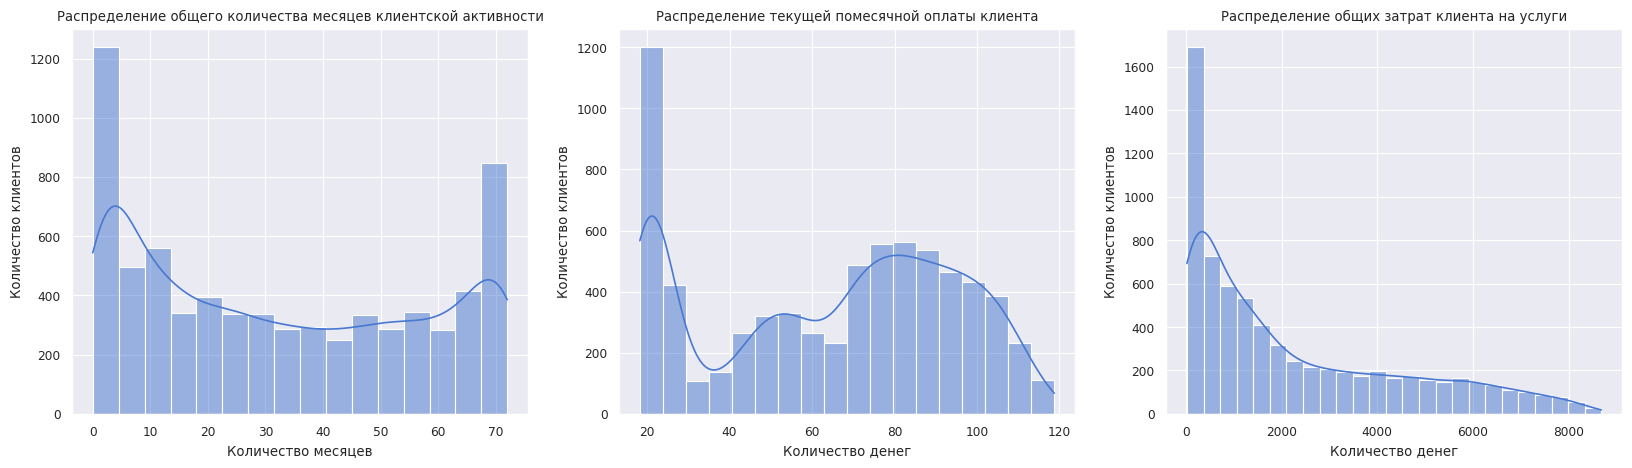

In [111]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data=df, x="tenure", ax=ax1, kde=True)
ax1.set_title("Распределение общего количества месяцев клиентской активности")
ax1.set_xlabel("Количество месяцев")
ax1.set_ylabel("Количество клиентов")

sns.histplot(data=df, x="MonthlyCharges", ax=ax2, kde=True)
ax2.set_title("Распределение текущей помесячной оплаты клиента")
ax2.set_xlabel("Количество денег")
ax2.set_ylabel("Количество клиентов")

sns.histplot(data=df, x="TotalCharges", ax=ax3, kde=True)
ax3.set_title("Распределение общих затрат клиента на услуги")
ax3.set_xlabel("Количество денег")
ax3.set_ylabel("Количество клиентов")
plt.show()

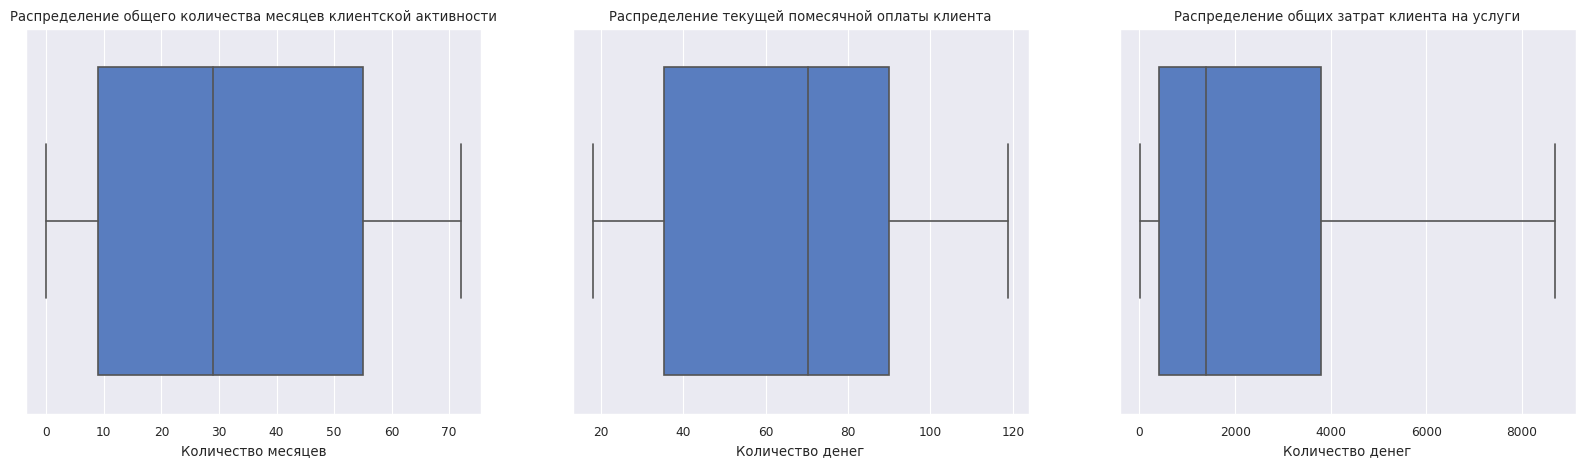

In [114]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(data=df, x="tenure", ax=ax1)
ax1.set_title("Распределение общего количества месяцев клиентской активности")
ax1.set_xlabel("Количество месяцев")

sns.boxplot(data=df, x="MonthlyCharges", ax=ax2)
ax2.set_title("Распределение текущей помесячной оплаты клиента")
ax2.set_xlabel("Количество денег")

sns.boxplot(data=df, x="TotalCharges", ax=ax3)
ax3.set_title("Распределение общих затрат клиента на услуги")
ax3.set_xlabel("Количество денег")

plt.show()

Взглянем на корреляцию между признаками

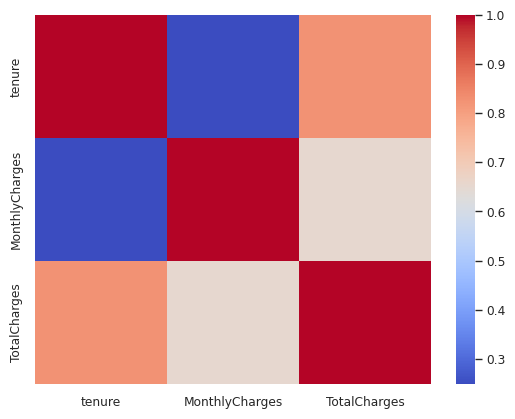

In [118]:
corr = df[["tenure", "MonthlyCharges", "TotalCharges"]].corr()
sns.heatmap(corr, cmap="coolwarm")
plt.show()

**Note**  
Наблюдается зависимость и она достаточно очевидная. Т.к. по факту `TotalCharges` = `MonthlyCharges` * `tenure`. Но по факту с тем условием, что клиент мог менять что-то в своей подписке и платить из-за этого больше или меньше.  
Скорей всего, `TotalCharges` придется убрать для лучшей интепретируемости модели

#### Посмотрим на категориальные и порядковые распределения в данных